<a href="https://colab.research.google.com/github/basangoudapatil/DW-19-assignment/blob/main/Task_7(salary).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text cell <undefined>
#%% [markdown]
## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

Code cell <undefined>
#%% [code]
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])




In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
print(df)

    Sex  Rank  Year  Degree  YSdeg  Salary
0     0     3    25       1     35   36350
1     0     3    13       1     22   35350
2     0     3    10       1     23   28200
3     1     3     7       1     27   26775
4     0     3    19       0     30   33696
5     0     3    16       1     21   28516
6     1     3     0       0     32   24900
7     0     3    16       1     18   31909
8     0     3    13       0     30   31850
9     0     3    13       0     31   32850
10    0     3    12       1     22   27025
11    0     2    15       1     19   24750
12    0     3     9       1     17   28200
13    0     2     9       0     27   23712
14    0     3     9       1     24   25748
15    0     3     7       1     15   29342
16    0     3    13       1     20   31114
17    0     2    11       0     14   24742
18    0     2    10       0     15   22906
19    0     3     6       0     21   24450
20    0     1    16       0     23   19175
21    0     2     8       0     31   20525
22    0    

In [3]:
df.shape

(52, 6)

In [4]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [5]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


Year

In [6]:
Q3 = df.Year.quantile(0.75)
Q1 = df.Year.quantile(0.25)

iqr = Q3 - Q1
upper_limit = Q3 + (1.5*iqr)
lower_limit = Q1 - (1.5*iqr)

print(lower_limit)
print(upper_limit)

-9.0
23.0


In [7]:
df.YSdeg.quantile(0.75)
df.YSdeg.quantile(0.25)

IQR = df.YSdeg.quantile(0.75) - df.YSdeg.quantile(0.25)
Upper_limit = df.YSdeg.quantile(0.75) + (1.5*IQR)
Lower_limit = df.YSdeg.quantile(0.25) - (1.5*IQR)

print(Upper_limit)
print(Lower_limit)

48.0
-18.0


In [8]:
df=df.drop_duplicates()

In [9]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

EDA

In [17]:
import matplotlib.pyplot as plt

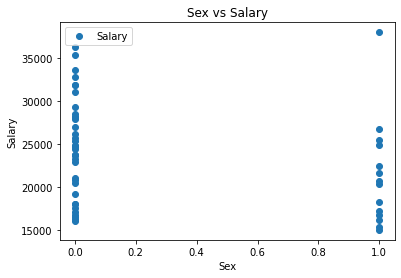

In [18]:
df.plot(x='Sex', y='Salary', style='o')
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

In [12]:
df.columns

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary'], dtype='object')

In [11]:
df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


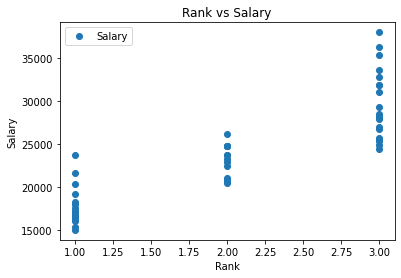

In [19]:
df.plot(x='Rank', y='Salary', style='o')
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()

In [13]:
df[['Rank','Salary']].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


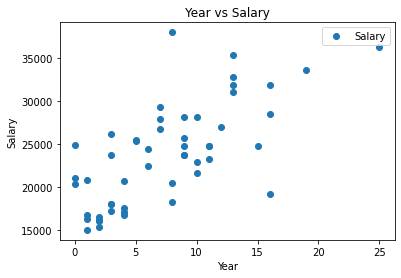

In [20]:
df.plot(x='Year', y='Salary', style='o')
plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

In [14]:
df[['Year','Salary']].corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


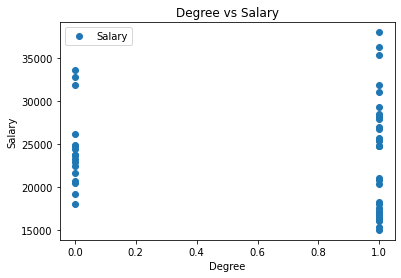

In [24]:
df['trnasDeg']=np.power(df['Degree'],0.5)
df.plot(x='Degree', y='Salary', style='o')
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

In [28]:
df[['Degree','Salary']].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


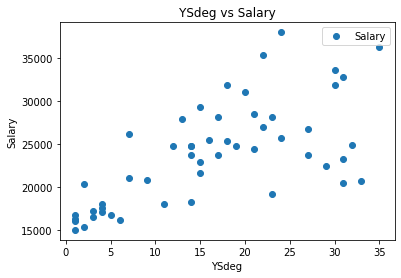

In [22]:
df.plot(x='YSdeg', y='Salary', style='o')
plt.title('YSdeg vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()

In [16]:
df[['YSdeg','Salary']].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


Split Data

In [29]:
X = df[['Sex', 'Rank', 'Year', 'YSdeg']].values
y = df[['Salary']].values

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data

Model Training 

In [36]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [38]:
regressor.coef_

array([[ 361.81273337, 4588.67178273, 2732.77060586, -975.7905491 ]])

In [39]:
regressor.intercept_

array([23610.53658537])

In [44]:
y_pred=regressor.predict(X_test_scaled)
print(y_pred)

[[24850.86847345]
 [31079.77504127]
 [17611.825646  ]
 [29371.16947341]
 [29401.83823488]
 [16883.74469501]
 [27320.88038537]
 [33199.84294166]
 [29972.31923405]
 [33484.37408384]
 [17995.56644522]]


In [51]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7622029428193977


In [56]:
y_pred1=regressor.predict([[0, 1, 20, 15]])
print(y_pred1)

[[68217.76224883]]


In [57]:
y_pred1=regressor.predict([[1, 1, 20, 15]])
print(y_pred1)

[[68579.57498219]]


Sex is not a factor of in Salary